### **Exercise 1**

In this exercise, you will implement a Simple Linear Regression class that is compatible with scikit-learn's estimator interface. You'll use gradient descent for optimization, as discussed in the lecture notes.

#### Task:

Create a `SimpleLinearRegression` class with the following methods:
1. `__init__(self, learning_rate=0.01, n_iterations=1000, tolerance=1e-6)`: Initialize the model parameters.
2. `fit(self, X, y)`: Fit the model to the training data using gradient descent.
3. `predict(self, X)`: Make predictions using the trained model.
4. `score(self, X, y)`: Calculate the coefficient of determination R^2 of the prediction.

#### Requirements:

- The class should inherit from `BaseEstimator` and `RegressorMixin` from scikit-learn.
- Use gradient descent to optimize the parameters (weight and bias).
- Store the weight as `self.coef_` and the bias as `self.intercept_` (note the trailing underscores).
- Implement early stopping in the `fit` method using the `tolerance` parameter.
- Ensure that the `fit`, `predict`, and `score` methods work with both 1D and 2D numpy arrays for X.

#### Hints:

- Remember to reshape input arrays if necessary to ensure consistent dimensions.
- The gradient descent update rules for simple linear regression are:
  - w = w - learning_rate * (1/n) * sum((y_pred - y) * x)
  - b = b - learning_rate * (1/n) * sum(y_pred - y)
- You can use `np.mean((y_true - y_pred) ** 2)` to calculate MSE for the stopping criterion.

R-squared score: 0.9374


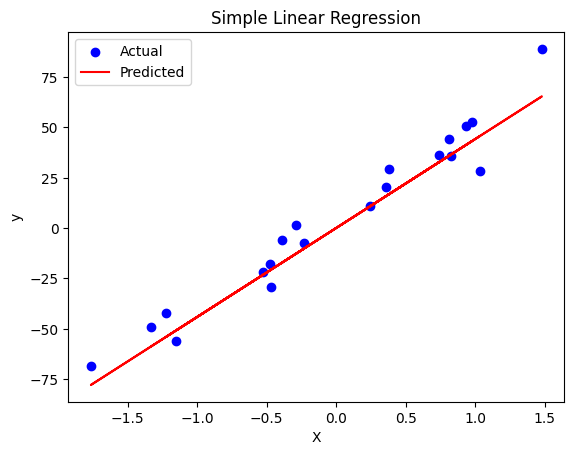

Coefficient (w): 44.2281
Intercept (b): 0.0909


In [1]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin

class SimpleLinearRegression(BaseEstimator, RegressorMixin):
    def __init__(self, learning_rate=0.01, n_iterations=1000, tolerance=1e-6):
        """
        Initializes the linear regression model with gradient descent.
        - learning_rate: Controls the step size of each update during gradient descent.
        - n_iterations: Maximum number of iterations for gradient descent.
        - tolerance: Early stopping criterion when the loss change is below this value.
        """
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.tolerance = tolerance
        self.coef_ = None  # Weight (coefficients)
        self.intercept_ = None  # Bias (intercept)
    
    def fit(self, X, y):
        """
        Fits the model to the training data using gradient descent.
        - X: Training data (features).
        - y: Target values (labels).
        """
        # Get the number of samples and features
        n_samples, n_features = X.shape
        # Initialize weights (coefficients) and intercept (bias) to zero
        self.coef_ = np.zeros(n_features)
        self.intercept_ = 0
        
        for i in range(self.n_iterations):
            # Make predictions (y_pred = w * X + b)
            y_pred = np.dot(X, self.coef_) + self.intercept_
            
            # Calculate the gradients (partial derivatives of the loss with respect to w and b)
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))  # Gradient of weights
            db = (1/n_samples) * np.sum(y_pred - y)  # Gradient of bias
            
            # Update the weights and bias using gradient descent
            self.coef_ -= self.learning_rate * dw
            self.intercept_ -= self.learning_rate * db
            
            # Compute the mean squared error (loss)
            loss = np.mean((y_pred - y) ** 2)
            
            # Early stopping if the change in loss is smaller than tolerance
            if np.abs(loss) < self.tolerance:
                break
    
    def predict(self, X):
        """
        Predicts the target values for given input X based on the trained model.
        - X: Input data to make predictions on.
        """
        return np.dot(X, self.coef_) + self.intercept_
    
    def score(self, X, y):
        """
        Calculates the R-squared score to evaluate the model's performance.
        - X: Input data to test the model.
        - y: Actual target values for the input data.
        """
        y_pred = self.predict(X)
        total_variance = np.sum((y - np.mean(y)) ** 2)
        residual_variance = np.sum((y - y_pred) ** 2)
        r2_score = 1 - (residual_variance / total_variance)
        return r2_score

# Example usage:
if __name__ == "__main__":
    # Import necessary tools
    from sklearn.datasets import make_regression
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt

    # Generate synthetic data for regression
    X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the SimpleLinearRegression model
    model = SimpleLinearRegression(learning_rate=0.01, n_iterations=1000)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Print R-squared score
    print(f"R-squared score: {model.score(X_test, y_test):.4f}")

    # Plot the results
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.plot(X_test, y_pred, color='red', label='Predicted')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.title('Simple Linear Regression')
    plt.show()

    # Print model parameters
    print(f"Coefficient (w): {model.coef_[0]:.4f}")
    print(f"Intercept (b): {model.intercept_:.4f}")


### **Exercise 2**

In this exercise, you will extend the Simple Linear Regression implementation from Exercise 4 to create a Multiple Linear Regression class. This class will also be compatible with scikit-learn's estimator interface and use gradient descent for optimization.

#### Task:

Create a `MultipleLinearRegression` class with the following methods:
1. `__init__(self, learning_rate=0.01, n_iterations=1000, tolerance=1e-6)`: Initialize the model parameters.
  - the "tolerance" parameter is used as a stopping criterion for the gradient descent algorithm. It helps determine when the algorithm should stop iterating, based on how much the model parameters are changing between iterations.
  - after each iteration in gradient descent, if the absolute value of the change in coefficients is less than tolerance, we can halt the gradient descent process
2. `fit(self, X, y)`: Fit the model to the training data using gradient descent.
3. `predict(self, X)`: Make predictions using the trained model.
4. `score(self, X, y)`: Calculate the coefficient of determination R^2 of the prediction.

#### Requirements:

- The class should inherit from `BaseEstimator` and `RegressorMixin` from scikit-learn.
- Use gradient descent to optimize the parameters (weights and bias).
- Store the weights as `self.coef_` and the bias as `self.intercept_` (note the trailing underscores).
- Implement early stopping in the `fit` method using the `tolerance` parameter.
- Ensure that the `fit`, `predict`, and `score` methods work with 2D numpy arrays for X.
- Handle multiple features in the input data.

#### Hints:

- The implementation will be very similar to the Simple Linear Regression class, but you'll need to handle multiple features.
- The gradient descent update rules for multiple linear regression are:
  - w = w - learning_rate * (1/n) * X.T.dot(y_pred - y)
  - b = b - learning_rate * (1/n) * sum(y_pred - y)
- You can use `np.mean((y_true - y_pred) ** 2)` to calculate MSE for the stopping criterion.

In [2]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array

class MultipleLinearRegression:
    # implement me
    pass

# Test the implementation
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_regression(n_samples=100, n_features=3, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = MultipleLinearRegression(learning_rate=0.01, n_iterations=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print R-squared score
print(f"R-squared score: {model.score(X_test, y_test):.4f}")

# Plot results (for the first feature)
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicted')
plt.xlabel('X (first feature)')
plt.ylabel('y')
plt.title('Multiple Linear Regression')
plt.legend()
plt.show()

print("Coefficients:", model.coef_)
print(f"Intercept: {model.intercept_:.4f}")

# Compare with sklearn's LinearRegression
from sklearn.linear_model import LinearRegression
sk_model = LinearRegression()
sk_model.fit(X_train, y_train)
sk_score = sk_model.score(X_test, y_test)
print(f"sklearn LinearRegression R-squared score: {sk_score:.4f}")

TypeError: MultipleLinearRegression() takes no arguments

### **Exercise 3**

In this exercise, you will compare the performance of your custom MultipleLinearRegression implementation with sklearn's LinearRegression. You'll examine the coefficients, intercept, and performance metrics while adjusting the learning rate of your custom implementation.

#### Task:

1. Generate a synthetic dataset using sklearn's `make_regression` function.
2. Implement a function to train both your custom MultipleLinearRegression and sklearn's LinearRegression on the same data.
3. Compare the coefficients, intercept, and R-squared scores of both models.
4. Experiment with different learning rates for your custom model and observe how it affects the results.
5. Create a plot showing the R-squared scores of your custom model for different learning rates.

#### Requirements:

- Use the MultipleLinearRegression class you implemented in Exercise 5.
- Test at least 5 different learning rates for your custom model.
- Create a plot comparing the performance (R-squared scores) of your custom model with different learning rates to sklearn's LinearRegression.
- Print a comparison of coefficients and intercepts for the best performing custom model and sklearn's model.

#### Hints:

- You can use `numpy.logspace` to generate a range of learning rates to test.
- Consider using a validation set to select the best learning rate for your custom model.
- Remember to reset your custom model before training with each new learning rate.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming you have your MultipleLinearRegression class from Exercise 5
# from multiple_linear_regression import MultipleLinearRegression

def compare_models(X_train, X_test, y_train, y_test, learning_rates):
    ## Implement me
    pass
    # Should return sk_model, sk_score, custom_scores

# Generate synthetic data
X, y = make_regression(n_samples=1000, n_features=5, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define learning rates to test
learning_rates = np.logspace(-4, 0, 9)

# Compare models
sk_model, sk_score, custom_scores = compare_models(X_train, X_test, y_train, y_test, learning_rates)

# Plot results
plt.figure(figsize=(10, 6))
plt.semilogx(learning_rates, custom_scores, 'bo-', label='Custom Model')
plt.axhline(y=sk_score, color='r', linestyle='--', label='sklearn Model')
plt.xlabel('Learning Rate')
plt.ylabel('R-squared Score')
plt.title('Model Performance Comparison')
plt.legend()
plt.grid(True)
plt.show()

# Find best performing custom model
best_lr_index = np.argmax(custom_scores)
best_lr = learning_rates[best_lr_index]
print(f"Best learning rate for custom model: {best_lr:.6f}")

# Train best custom model
best_custom_model = MultipleLinearRegression(learning_rate=best_lr, n_iterations=1000)
best_custom_model.fit(X_train, y_train)

# Compare coefficients and intercepts
print("\nCoefficients comparison:")
print("sklearn Model:", sk_model.coef_)
print("Custom Model:", best_custom_model.coef_)

print("\nIntercept comparison:")
print("sklearn Model:", sk_model.intercept_)
print("Custom Model:", best_custom_model.intercept_)

print("\nR-squared scores:")
print("sklearn Model:", sk_score)
print("Best Custom Model:", custom_scores[best_lr_index])

### **Exercise 4**

In this exercise, you will learn about scikit-learn pipelines and use them to combine your custom LogTransform class from Exercise 2 from last week with your MultipleLinearRegression class from Exercise 2. This will demonstrate how your custom classes can be integrated into the scikit-learn ecosystem.

#### Introduction to Pipelines

Pipelines in scikit-learn are a way to chain multiple steps that can be cross-validated together while setting different parameters. They help in preventing data leakage between train and test sets and make your code cleaner and more modular.

The `make_pipeline` function is a simple way to create a pipeline. It takes a series of estimators and returns a pipeline that chains them in sequence.

#### Task:

1. Create a pipeline that applies the LogTransform to the input features and then uses the MultipleLinearRegression for prediction.
2. Compare the performance of this pipeline with a pipeline using sklearn's StandardScaler and LinearRegression.
3. Use the pipelines on a dataset where a log transformation might be beneficial (e.g., data with exponential relationships in the features).

#### Requirements:

- Use the LogTransform class you implemented in Exercise 2.
- Use the MultipleLinearRegression class you implemented in Exercise 5.
- Create two pipelines using `make_pipeline`:
  a. Custom pipeline: LogTransform -> MultipleLinearRegression
  b. sklearn pipeline: StandardScaler -> LinearRegression
- Generate a synthetic dataset where log transformation of features could be beneficial.
- Compare the R-squared scores of both pipelines.
- Create scatter plots comparing the predictions of both pipelines against the true values.

#### Hints:

- You can use `make_regression` with an exponential transformation on the features to create a dataset where log transformation might be useful.
- Remember to handle any potential issues with non-positive values when applying the log transform.
- Use scikit-learn's `make_pipeline` function to create the pipelines.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming you have your LogTransform and MultipleLinearRegression classes from previous exercises
# from log_transform import LogTransform
# from multiple_linear_regression import MultipleLinearRegression

# Generate synthetic data with exponential relationship in features
n_samples, n_features = 1000, 5
X, y = make_regression(n_samples=n_samples, n_features=n_features, noise=0.1, random_state=42)
X = np.exp(X)  # Apply exponential transformation to create non-linear relationship in features
X = np.abs(X) + 1e-5  # Ensure all values are positive for log transform

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create custom pipeline
custom_pipeline = make_pipeline(
    #implment me
)

# Create sklearn pipeline
sklearn_pipeline = make_pipeline(
    #implment me
)

# Fit both pipelines
custom_pipeline.fit(X_train, y_train)
sklearn_pipeline.fit(X_train, y_train)

# Make predictions
custom_pred = custom_pipeline.predict(X_test)
sklearn_pred = sklearn_pipeline.predict(X_test)

# Calculate R-squared scores
custom_r2 = r2_score(y_test, custom_pred)
sklearn_r2 = r2_score(y_test, sklearn_pred)

print("R-squared scores:")
print(f"Custom Pipeline: {custom_r2:.4f}")
print(f"sklearn Pipeline: {sklearn_r2:.4f}")

# Create scatter plots
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.scatter(y_test, custom_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Custom Pipeline: LogTransform + MultipleLinearRegression")

plt.subplot(122)
plt.scatter(y_test, sklearn_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("sklearn Pipeline: StandardScaler + LinearRegression")

plt.tight_layout()
plt.show()

# Compare pipeline steps
print("\nCustom Pipeline steps:")
print(custom_pipeline.steps)

print("\nsklearn Pipeline steps:")
print(sklearn_pipeline.steps)

# If you want to access the coefficients of the regression models:
custom_coef = custom_pipeline.named_steps['multiplelinearregression'].coef_
sklearn_coef = sklearn_pipeline.named_steps['linearregression'].coef_

print("\nRegression Coefficients:")
print("Custom Pipeline:", custom_coef)
print("sklearn Pipeline:", sklearn_coef)